# Main Plotting of liftetime exposure for water scarcity -- remake
For water scarcity
Main script for plotting, does analysis based on script

In [1]:
import os
import xarray as xr
import pickle as pk
import time
import matplotlib as mpl
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import pandas as pd

from settings import *
from load_manip import *
from exposure import * 
from utils import *
from main_function import *
from plotting import *

import warnings
warnings.filterwarnings("ignore")

# set own plotting parameters
set_plot_param()
map_proj = ccrs.Robinson(central_longitude=0, globe=None)


# customized plotting parameters

labelfontsize=12
titlesize=14
labelsize=titlesize
mpl.rc('xtick',labelsize=labelfontsize)
mpl.rc('ytick',labelsize=labelfontsize)
mpl.rc('axes',titlesize=titlesize)
mpl.rc('axes',labelsize=labelsize)
mpl.rc('legend',fontsize='large')

%matplotlib inline 

In [2]:
# extreme event
global flags

flags = {}
flags['extr'] = 'waterdeficit'   # 0: all
                                  # 2: cropfailedarea
                                  # 3: waterscarcity
                                  # 4: falkenmark 
                                  # 5: water deficit
flags['mode'] = 'exposure'   # whether to calculate exposure, duration, intensity or all. 

flags['runs'] = 0           # 0: do not process ISIMIP runs (i.e. load runs pickle)
                            # 1: process ISIMIP runs (i.e. produce and save runs as pickle)
flags['mask'] = 0           # 0: do not process country data (i.e. load masks pickle)
                            # 1: process country data (i.e. produce and save masks as pickle)
flags['exposure'] = 0       # 0: do not process ISIMIP runs to compute exposure (i.e. load exposure pickle)
                            # 1: process ISIMIP runs to compute exposure (i.e. produce and save exposure as pickle)
flags['exposure_pic'] = 0   # 0: do not process ISIMIP runs to compute picontrol exposure (i.e. load exposure pickle)
                            # 1: process ISIMIP runs to compute picontrol exposure (i.e. produce and save exposure as pickle)
flags['expectancy'] = 0     # 0: Load varying life expectancies
                            # 1: Constant life expectancies at 1960 levels

rcps = ['RCP60','RCP26']
rcp_text = {'RCP60': 'RCP 6.0', 'RCP26' : 'RCP 2.6'  }

labels = ['a.','b.','c.','d.','e.','f.','g.','h.','f.']
labels = ['A','B','C','D','E','F','G','H','F']

regions =['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa']
# TODO: add rest of flags

### Load and manipulate  files for plotting

In [3]:
# load country borders (from pickles)

d_countries = pd.read_pickle(open('./data/pickles/country_info.pkl', 'rb'))
df_countries = d_countries['info_pop']

# unpack country information
gdf_country_borders = d_countries['borders']

# load cohort info
d_regions = pd.read_pickle(open('./data/pickles/region_info.pkl', 'rb'))

# unpack region information
df_birthyears_regions = d_regions['birth_years']
df_life_expectancy_5_regions = d_regions['life_expectancy_5']
d_cohort_weights_regions = d_regions['cohort_size']
d_cohort_size = d_countries['cohort_size']
d_all_cohorts = d_countries['all_cohorts']

## Calculate water deficit

In [8]:
# Calculate water deficit per RCP
ds_pct_waterdeficit, ds_pct_waterdeficit_perregion, a, b = calc_lifetime_waterdeficit(flags)


Loading processed country and region data
Loading processed isimip data
Loading processed exposures
Loading processed country and region data
Loading processed isimip data
Loading processed exposures


## Map

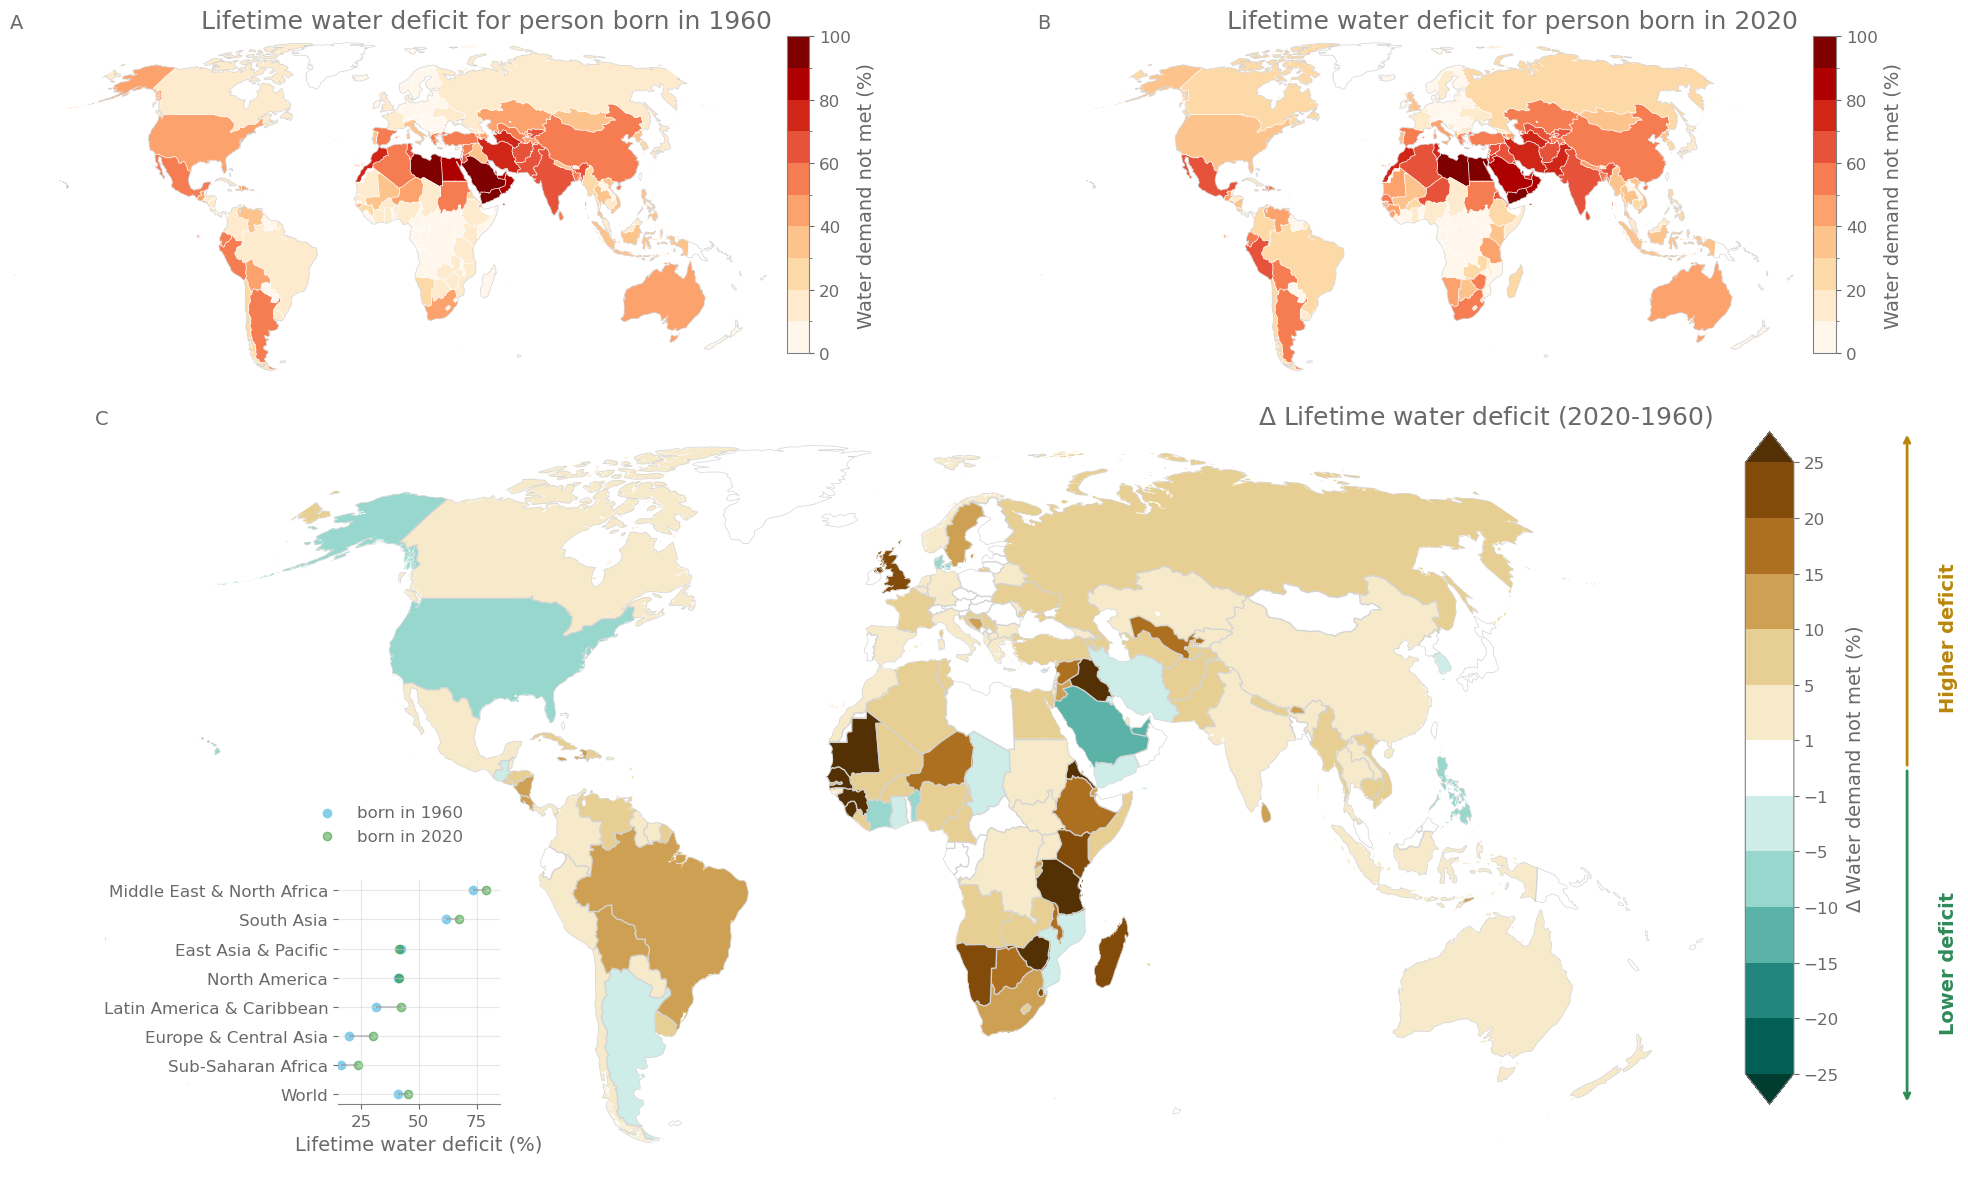

In [9]:
# ------------------------------------------------
# Create figure and load variable

fig = plt.figure(figsize=(30,12))

rcp = 'RCP'
variable = 'mmm_'+rcp
da = ds_pct_waterdeficit[variable]


# colorbar settings for 2 upper plots
bounds = np.array([0,10,20,30,40,50,60,70,80,90,100])
legend_label = "Water demand not met (%)"


# ------------------------------------------------
# Panel a 
ax = plt.subplot2grid(shape=(3,3), loc=(0,0), colspan=1, projection=map_proj)

# ax settings
ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)
cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis

# data plotting
birth_year = 1960
df_1960 = da.sel({'birth_year' : birth_year}).to_dataframe()
gdf_exposure_birthyear = gdf_country_borders.merge(df_1960[variable], left_index=True, right_on='country')
gdf_exposure_birthyear.plot(ax=ax, column=variable, cax=cax, legend = True,  cmap='OrRd', legend_kwds={'label': legend_label}, vmax=100, transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256))

# title settings
ax.set_title('Lifetime water deficit for person born in '+str(birth_year), loc='right', size=18); 
ax.set_title(labels[0], loc='left'); 


# ------------------------------------------------
# Panel b 
ax = plt.subplot2grid(shape=(3,3), loc=(0,1), colspan=1, projection=map_proj)

# ax settings
ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)
cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis

# data plotting
birth_year = 2020
df_2020 = da.sel({'birth_year' : birth_year}).to_dataframe()
gdf_exposure_birthyear = gdf_country_borders.merge(df_2020[variable], left_index=True, right_on='country')
gdf_exposure_birthyear.plot(ax=ax, column=variable, cax=cax, legend = True,  cmap='OrRd', legend_kwds={'label': legend_label}, vmax=100, transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256))

# title settings
ax.set_title('Lifetime water deficit for person born in '+str(birth_year), loc='right', size=18); 
ax.set_title(labels[1], loc='left'); 


# ------------------------------------------------
# Panel c 
ax = plt.subplot2grid(shape=(3,3), loc=(1,0), colspan=2, rowspan=2, projection=map_proj)


# colorbar settings
legend_label = '$\Delta$ '+ legend_label
bounds = np.array([-30,-25,-20,-15,-10,-5,-1,1,5,10,15,20,25,30])
bounds = np.array([-25,-20,-15,-10,-5,-1,1,5,10,15,20,25])

cmap_ticks = bounds #np.array([-30,-20,-10,-5,-1,1,5,10,20,30])
# ax settings
ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='lightgray',linewidth=1)
cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis

# Define the colormap and the number of levels
colormap = plt.cm.get_cmap('BrBG_r')
num_levels = len(bounds)+1
# Create the ListedColormap
new_cmap = ListedColormap(colormap(np.linspace(0, 1, num_levels)))
# Generate color codes for each level
color_codes = [colors.to_hex(new_cmap(i)) for i in range(num_levels)]
color_codes[int(len(color_codes)/2 )] = '#ffffff'

cmap = ListedColormap(color_codes)

# data plotting
d_waterdeficit = (df_2020-df_1960)
gdf_delta_birthyear = gdf_country_borders.merge(d_waterdeficit, left_index=True, right_on='country')
gdf_delta_birthyear.plot(ax=ax, column=variable, legend = True,  cmap=cmap,  cax=cax, legend_kwds={'label': legend_label, 'ticks':cmap_ticks, 'aspect': 10 }, vmin=-30, vmax=30, transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=cmap.N, extend='both'))

# title settings
ax.set_title('$\Delta$ Lifetime water deficit (2020-1960)',  loc='right', size=18);
ax.set_title(labels[2], loc='left'); 


# arrow settings 
xpos = 1.12
ypos = 0.55

ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos+0.45), arrowprops=dict(arrowstyle="<-", color="darkgoldenrod",linewidth=2));
ax.annotate('', xy=(xpos,ypos), xycoords=("axes fraction"), xytext=(xpos,ypos-0.45), arrowprops=dict(arrowstyle="<-", color="seagreen",linewidth=2));

xpos_text = xpos+0.02

ax.annotate('Higher deficit', xy=(xpos_text,ypos+0.35), xycoords=("axes fraction"), xytext=(xpos_text,ypos+0.08), fontsize=14, rotation=90, color="darkgoldenrod", fontweight="semibold"); 
ax.annotate('Lower deficit', xy=(xpos_text,ypos-0.35), xycoords=("axes fraction"), xytext=(xpos_text,ypos-0.35), fontsize=14, rotation=90, color="seagreen", fontweight="semibold");


# ------------------------------------------------
# Panel d - inset lollipop plot

ax_inset = ax.inset_axes([0.15, 0.1, 0.1, 0.3]) #[x0, y0, width, height]

var_type = ''#'delta_'
rcp = 'RCP60'
var = 'mmm_'+var_type+rcp

# get values
df_temp = ds_pct_waterdeficit_perregion[var].sel(birth_year=1960).to_dataframe().drop(['birth_year'],axis=1)
values_2020 = ds_pct_waterdeficit_perregion[var].sel(birth_year=2020).values

values = np.stack((df_temp.index.values,np.squeeze(df_temp.values),values_2020))
df_1960 = pd.DataFrame(values.T, columns=['regions','1960','2020'])

regions_for_plot = regions + ["World"]
df = df_1960[df_1960["regions"].isin(regions_for_plot)].sort_values(by='1960',ascending=True) 
# Move "World" to the end
df = pd.concat([df[df['regions'] == 'World'], df[df['regions'] != 'World'] ], ignore_index=True)
my_range=range(1,len(df.index)+1)

# do plotting 
ax_inset.hlines(y=my_range, xmin=df['1960'], xmax=df['2020'], color='grey', alpha=0.4)
ax_inset.scatter(df['1960'], my_range, color='skyblue', alpha=1, label='born in 1960')
ax_inset.scatter(df['2020'], my_range, color='green', alpha=0.4 , label='born in 2020')

# plot settings
ax_inset.legend(bbox_to_anchor=(0.3,1.4), loc='upper center', frameon=False);
ax_inset.set_yticks(my_range)
ax_inset.set_yticklabels(df['regions']); 
ax_inset.spines[['right', 'left', 'top']].set_visible(False)    
ax_inset.set_xlabel('Lifetime water deficit (%)')
ax_inset.grid(color='lightgray', alpha=0.5)
ax_inset.set_xlim((15,85));
#ax_inset.set_title(labels[3], loc='left'); 


# ------------------------------------------------
# Save figurea

fig.tight_layout()
plt.savefig('figures/maps.png', bbox_inches='tight',dpi=600)



### Values

In [10]:
# average lifetime water deficit global 1960 birth cohort
print(f"Global average lifetime water deficit for 1960 birth cohort: {df.loc[df['regions'] == 'World', ['1960']].values[0][0]:.0f} %")

# average lifetime water deficit global 2020 birth cohort
print(f"Global average lifetime water deficit for 2020 birth cohort: {df.loc[df['regions'] == 'World', ['2020']].values[0][0]:.0f} %")

print(f"Difference 2020 and 1960 birth cohort: {df.loc[df['regions'] == 'World', ['2020']].values[0][0] - df.loc[df['regions'] == 'World', ['1960']].values[0][0] :.0f} %")

print(" ")


print("Lifetime water deficit for selected countries for 1960 birth cohort:")
countries_to_extract = ["Egypt", "Yemen", "Libya", "Saudi Arabia", "Oman", "United Arab Emirates"]
df_1960_countries = da.sel({'birth_year' : 1960}).to_dataframe()
df_2020_countries = da.sel({'birth_year' : 2020}).to_dataframe()
for country in countries_to_extract:
    print(f"{country}: {df_1960_countries.loc[country, 'mmm_RCP']:.0f} %")

print(" ")


print("Generational difference in lifetime water deficit for selected countries (2020-1960):")
df_diff = df_2020_countries - df_1960_countries
countries_to_extract = ["Sierra Leone", "Zimbabwe","Eritrea","Mauritania", "United Arab Emirates", "Saudi Arabia", "Denmark", "Philippines"]
for country in countries_to_extract:
    print(f"{country}: {df_diff.loc[country, 'mmm_RCP']:.0f} %")


print(" ")

print("Generational difference in lifetime water deficit for selected regions (2020-1960):")
regions_to_extract = [ 'Latin America & Caribbean',  'Europe & Central Asia',  'Sub-Saharan Africa']
for region in regions_to_extract:
    diff_region = (df.loc[df['regions'] == region, ['2020']].values - df.loc[df['regions'] == region, ['1960']].values)[0][0]
    print(f"{region}: {diff_region:.0f} %")

Global average lifetime water deficit for 1960 birth cohort: 41 %
Global average lifetime water deficit for 2020 birth cohort: 45 %
Difference 2020 and 1960 birth cohort: 4 %
 
Lifetime water deficit for selected countries for 1960 birth cohort:
Egypt: 88 %
Yemen: 92 %
Libya: 91 %
Saudi Arabia: 92 %
Oman: 84 %
United Arab Emirates: 90 %
 
Generational difference in lifetime water deficit for selected countries (2020-1960):
Sierra Leone: 43 %
Zimbabwe: 40 %
Eritrea: 36 %
Mauritania: 33 %
United Arab Emirates: -11 %
Saudi Arabia: -11 %
Denmark: -6 %
Philippines: -7 %
 
Generational difference in lifetime water deficit for selected regions (2020-1960):
Latin America & Caribbean: 11 %
Europe & Central Asia: 11 %
Sub-Saharan Africa: 7 %


In [11]:
print(f"Total water withdrawal and demand")


flags['extr'] = 'waterdeficit'   # 0: all
ds_waterdeficit, ds_waterdeficit_perregion, d_waterdeficit_allruns = do_lifetime_analysis(flags)


# load lifetime waterwithdrawal
flags['extr'] = 'withdrawal'   # 0: all
ds_withdrawal, ds_withdrawal_perregion, d_withdrawal_allruns = do_lifetime_analysis(flags)


waterdeficit_m3_world = ds_waterdeficit_perregion.sel(region='World').sel(birth_year=1960)["mmm_RCP"].values
waterdemand_m3_world = ds_withdrawal_perregion.sel(region='World').sel(birth_year=1960)["mmm_RCP"].values
print(" ")
print(f"World water deficit 1960 birth cohort: {waterdeficit_m3_world:.0f} m³")
print(f"World water demand 1960 birth cohort: {waterdemand_m3_world:.0f} m³")
print(" ")
waterdeficit_m3_world_2020 = ds_waterdeficit_perregion.sel(region='World').sel(birth_year=2020)["mmm_RCP"].values
waterdemand_m3_world_2020 = ds_withdrawal_perregion.sel(region='World').sel(birth_year=2020)["mmm_RCP"].values
print(" ")
print(f"World water deficit 2020 birth cohort: {waterdeficit_m3_world_2020:.0f} m³")
print(f"World water demand 2020 birth cohort: {waterdemand_m3_world_2020:.0f} m³")

print(" ")
print(f"Difference in world water deficit 2020-1960 birth cohort: {waterdeficit_m3_world_2020-waterdeficit_m3_world:.0f} m³")


Total water withdrawal and demand
Loading processed country and region data


Loading processed isimip data
Loading processed exposures
Loading processed country and region data
Loading processed isimip data
Loading processed exposures
 
World water deficit 1960 birth cohort: 68915 m³
World water demand 1960 birth cohort: 103422 m³
 
 
World water deficit 2020 birth cohort: 1438202 m³
World water demand 2020 birth cohort: 1807920 m³
 
Difference in world water deficit 2020-1960 birth cohort: 1369287 m³


In [12]:
waterdeficit_m3_world/waterdemand_m3_world

np.float64(0.6663471797038589)

In [13]:
68900/103400

0.6663442940038685

### Country ranking Figure

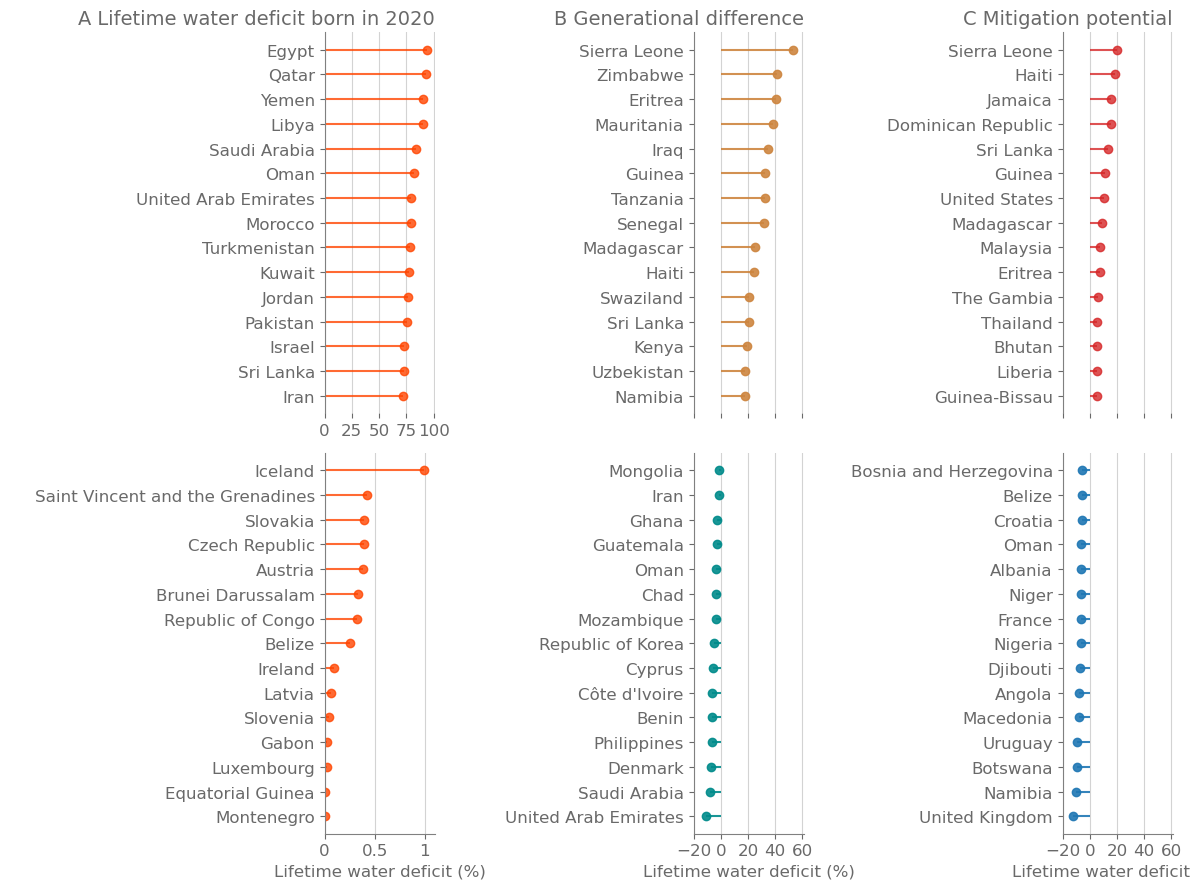

In [14]:
# multi-model mean

labelfontsize=12
titlesize=14
labelsize=titlesize
mpl.rc('xtick',labelsize=labelfontsize)
mpl.rc('ytick',labelsize=labelfontsize)
mpl.rc('axes',titlesize=titlesize)
mpl.rc('axes',labelsize=labelsize)
mpl.rc('legend',fontsize='large')

da = ds_pct_waterdeficit['mmm_RCP60']
df_1960 = da.to_pandas().loc[1960].transpose()
df_2020 = da.to_pandas().loc[2020].transpose()

# multi-model mean
da_rcp60 = ds_pct_waterdeficit['mmm_RCP60']
da_rcp26 = ds_pct_waterdeficit['mmm_RCP26']
df_rcp60 = da_rcp60.to_pandas().loc[2020].transpose()
df_rcp26 = da_rcp26.to_pandas().loc[2020].transpose()

df_mitigation = df_rcp60 - df_rcp26

## create figure

nsel=15
fig, axes = plt.subplots(2,3, figsize=(12,9))
axes=axes.flatten()

ax=axes[0]


df_2020_sorted = df_2020.sort_values(ascending=False)[:nsel]

my_range=range(1,len(df_2020_sorted.index)+1)
ax.hlines(y=my_range, xmin=0, xmax=df_2020_sorted.iloc[::-1], color='orangered', alpha=0.8)
ax.plot(df_2020_sorted.iloc[::-1], my_range, "o", color='orangered', alpha=0.8)
ax.set_yticks(my_range)
ax.set_yticklabels(df_2020_sorted.iloc[::-1].index.values)

ax.set_ylabel(' ');
ax.set_xlim([0,101])
ax.set_xticks([0,25,50,75,100])
ax.spines[['right',  'top', 'bottom']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
ax.set_title('A Lifetime water deficit born in 2020',loc='right', fontsize=14);

ax=axes[1]

df_delta_sorted = (df_2020 - df_1960).sort_values(ascending=False)[:nsel]

my_range=range(1,len(df_delta_sorted.index)+1)
ax.hlines(y=my_range, xmin=0, xmax=df_delta_sorted.iloc[::-1], alpha=0.9, color='peru')
ax.plot(df_delta_sorted.iloc[::-1], my_range, "o", alpha=0.9, color='peru')
ax.set_yticks(my_range)
ax.set_yticklabels(df_delta_sorted.iloc[::-1].index.values)

ax.set_ylabel(' ');
ax.set_xlim([-20,61])
ax.set_xticks([-20,0,20,40,60])
ax.spines[['right',  'top',  'bottom']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
ax.set_title('B Generational difference',loc='right', fontsize=14);
ax.tick_params(labelbottom=False)

ax=axes[2]

df_mitigation_sorted = df_mitigation.sort_values(ascending=False)[:nsel]

my_range=range(1,len(df_mitigation_sorted.index)+1)
ax.hlines(y=my_range, xmin=0, xmax=df_mitigation_sorted.iloc[::-1], color='tab:red', alpha=0.8)
ax.plot(df_mitigation_sorted.iloc[::-1], my_range, "o", color='tab:red', alpha=0.8)
ax.set_yticks(my_range)
ax.set_yticklabels(df_mitigation_sorted.iloc[::-1].index.values)

ax.set_ylabel(' ');
ax.set_xlim([-20,61])
ax.set_xticks([-20,0,20,40,60])
ax.spines[['right',  'top', 'bottom']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
ax.set_title('C Mitigation potential',loc='right', fontsize=14);
ax.tick_params(labelbottom=False)



ax=axes[3]


df_2020_sorted = df_2020.sort_values(ascending=False).dropna()[-nsel:]

my_range=range(1,len(df_2020_sorted.index)+1)
ax.hlines(y=my_range, xmin=0, xmax=df_2020_sorted.iloc[::-1], color='orangered', alpha=0.8)
ax.plot(df_2020_sorted.iloc[::-1], my_range, "o", color='orangered', alpha=0.8)
ax.set_yticks(my_range)
ax.set_yticklabels(df_2020_sorted.iloc[::-1].index.values)


ax.set_xlabel('Lifetime water deficit (%)', fontsize=12);
ax.set_ylabel(' ');
ax.set_xlim([0,1.1])
ax.set_xticks([0, 0.5,  1])
ax.set_xticklabels([0, 0.5,  1])

ax.spines[['right',  'top']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)

ax=axes[4]

df_delta_sorted = (df_2020 - df_1960).sort_values(ascending=False).dropna()[-nsel:].rename(index={'Côte d\Ivoire':'Côte d\'Ivoire'})

my_range=range(1,len(df_delta_sorted.index)+1)
ax.hlines(y=my_range, xmin=0, xmax=df_delta_sorted.iloc[::-1], color='darkcyan', alpha=0.9)
ax.plot(df_delta_sorted.iloc[::-1], my_range, "o", color='darkcyan', alpha=0.9)
ax.set_yticks(my_range)
ax.set_yticklabels(df_delta_sorted.iloc[::-1].index.values)


ax.set_xlabel('Lifetime water deficit (%)', fontsize=12);
ax.set_ylabel(' ');
ax.set_xlim([-20,61])
ax.set_xticks([-20,0,20,40,60])
ax.spines[['right',  'top']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)


ax=axes[5]

df_mitigation_sorted = df_mitigation.sort_values(ascending=False).dropna()[-nsel:]

my_range=range(1,len(df_mitigation_sorted.index)+1)
ax.hlines(y=my_range, xmin=0, xmax=df_mitigation_sorted.iloc[::-1], color='tab:blue', alpha=0.9)
ax.plot(df_mitigation_sorted.iloc[::-1], my_range, "o", color='tab:blue', alpha=0.9)
ax.set_yticks(my_range)
ax.set_yticklabels(df_mitigation_sorted.iloc[::-1].index.values)

ax.set_xlabel('Lifetime water deficit (%)', fontsize=12);
ax.set_ylabel(' ');
ax.set_xlim([-20,61])
ax.set_xticks([-20,0,20,40,60])
ax.spines[['right',  'top']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
fig.tight_layout()
plt.savefig('figures/country_rankings.png', bbox_inches='tight',dpi=600)



## Values

In [15]:
print("Countries with highest mitigation potential: ")

countries_to_select = ["Sierra Leone", "Haiti", "Jamaica", "Dominican Republic","Sri Lanka", "United States"]

for country in countries_to_select: 
    print(f"{country}: {df_mitigation.loc[country]:.2f} %")

print(" ")

print("Region with highest mitigation potential: ")

da_rcp60 = ds_pct_waterdeficit_perregion['mmm_RCP60']
da_rcp26 = ds_pct_waterdeficit_perregion['mmm_RCP26']
df_rcp60 = da_rcp60.to_pandas().loc[2020].transpose()
df_rcp26 = da_rcp26.to_pandas().loc[2020].transpose()

df_mitigation_region = df_rcp60 - df_rcp26

region = 'North America'

print(f"{region}: {df_mitigation_region.loc[region]:.2f} %")


Countries with highest mitigation potential: 
Sierra Leone: 19.90 %
Haiti: 18.76 %
Jamaica: 15.79 %
Dominican Republic: 15.37 %
Sri Lanka: 13.33 %
United States: 10.84 %
 
Region with highest mitigation potential: 
North America: 10.03 %


## Regions figure appendix

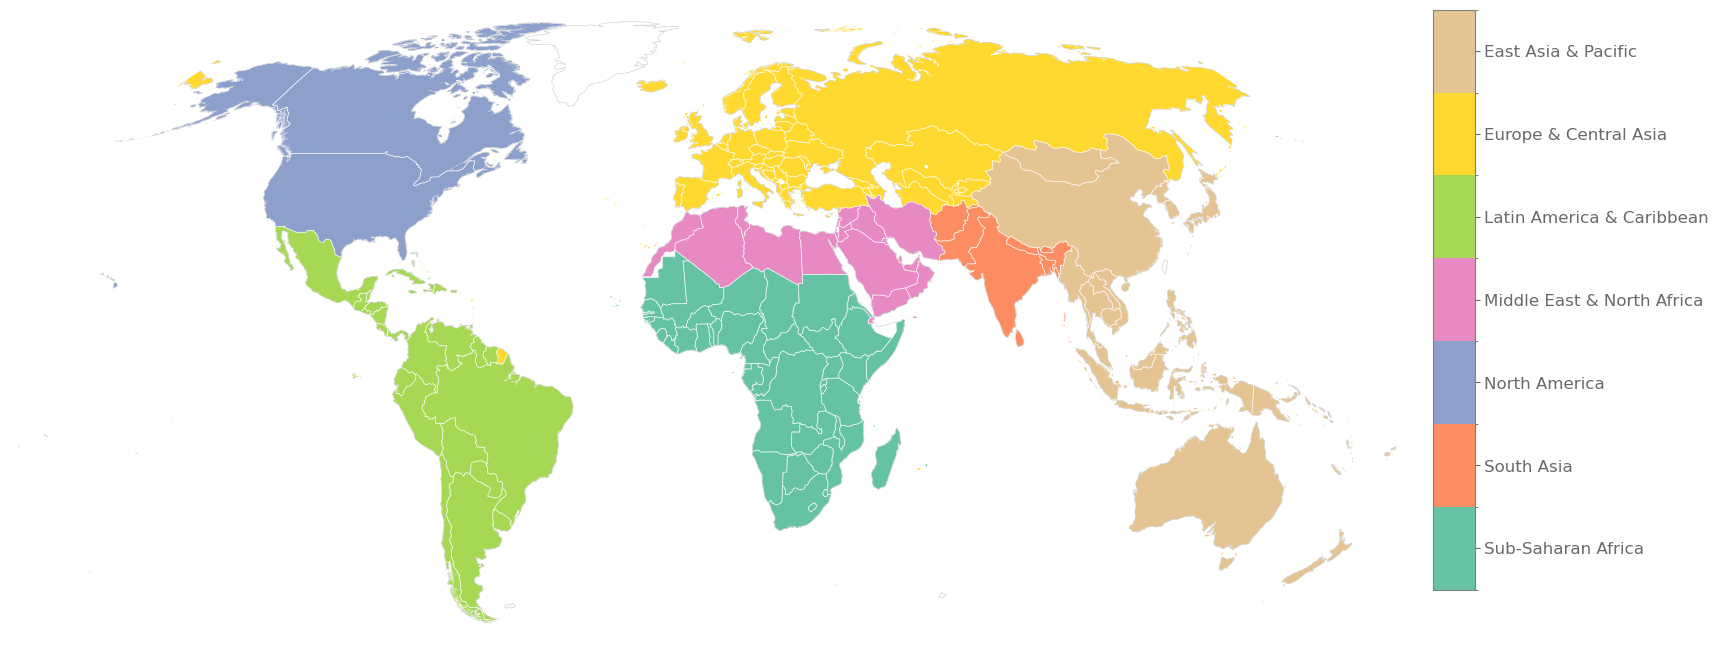

In [21]:
regions = np.flip(np.unique(gdf_country_borders['region'].values))
region_indices = np.arange(0, len(np.unique(gdf_country_borders['region'].values)))

gdf_country_borders['index'] = gdf_country_borders.apply(lambda row: list(regions).index(row['region']), axis=1)   
fig, ax = plt.subplots(figsize=(18,10), subplot_kw={'projection':map_proj})

ax.axis('off')
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)

cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis
#ax.set_title('World regions', loc='right', fontsize=25); 
#ax.set_title('a.', loc='right', fontsize=25); 

bounds = [0,1,2,3,4,5,6,7]
ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5]
gdf_country_borders.plot(ax=ax, column='index',cax=cax, cmap='Set2', transform=ccrs.PlateCarree(), legend=True, legend_kwds={'ticks': ticks}, vmax=7, norm = colors.BoundaryNorm(boundaries=bounds, ncolors=7))

cax.set_yticklabels(regions);

plt.savefig('figures/world_regions.png', bbox_inches='tight',dpi=600)


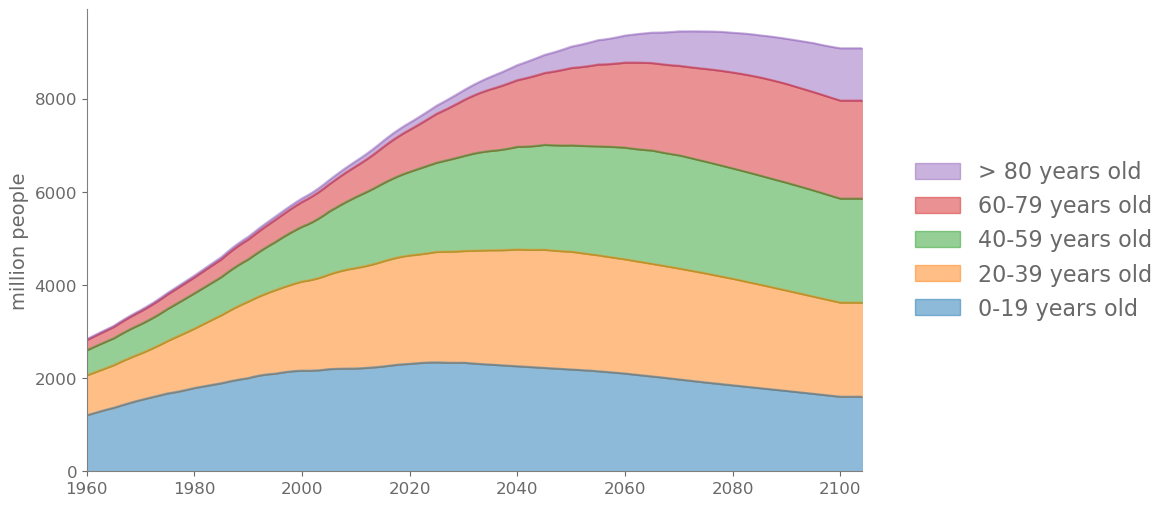

In [22]:
# simple plot on birth rates in Kenya over the years (cohort size of age 0)
# Age pyramid in a plot
d_total_cohorts = sum(d_all_cohorts[item] for item in d_all_cohorts)

group_boundaries = np.arange(0,110,10)

group_boundaries = np.array([  0,   20,   40, 60,  80,  104])

d_cohorts_group = {}
total_cohorts_groups = pd.DataFrame()
for i,bound in enumerate(group_boundaries[:-1]): 
    d_cohorts_group[str(group_boundaries[i])+'-'+str(group_boundaries[i+1]-1)+ ' years old'] = d_total_cohorts[list(np.arange(group_boundaries[i], group_boundaries[i+1]))].sum(axis=1).rename('population')

       
total_cohorts_groups = pd.concat(d_cohorts_group, axis=1) *1000 *1e-6
total_cohorts_groups.rename(columns={'80-103 years old':'> 80 years old'}, inplace=True)
fig,ax = plt.subplots(figsize=(10,6))
total_cohorts_groups.plot.area(ax=ax, alpha=0.5)
#ax.set_title('SSP2 global population evolution according to age classes', loc='right' )

ax.set_xlim([1960,2104])
ax.set_ylabel('million people');

ax.spines[['right', 'top']].set_visible(False)    

handles, labels = plt.gca().get_legend_handles_labels()
ax.legend(np.flip(handles), np.flip(labels), frameon=False,bbox_to_anchor=(1.4,0.5), loc='right', fontsize=16)
plt.savefig('figures/population.png', bbox_inches='tight',dpi=600)



In [23]:
# reshuffle the cohorts form a per country dictionary, to a per year dictionary. 

d_cohorts_peryear = {}
df_concat = pd.DataFrame()
for key, value in d_all_cohorts.items():
    df = value
    df.loc[:,'Country'] = key
    df_concat = pd.concat([df, df_concat])


for year in df_concat.index:
   
    d_cohorts_peryear[year] =  df_concat.loc[year,:].set_index('Country')*1000
    
    
    
# load country borders (from pickles)
d_countries = pd.read_pickle(open('./data/pickles/country_info.pkl', 'rb'))
df_countries = d_countries['info_pop']

# unpack country information
gdf_country_borders = d_countries['borders']
df_life_expectancy_5 = d_countries['life_expectancy_5']


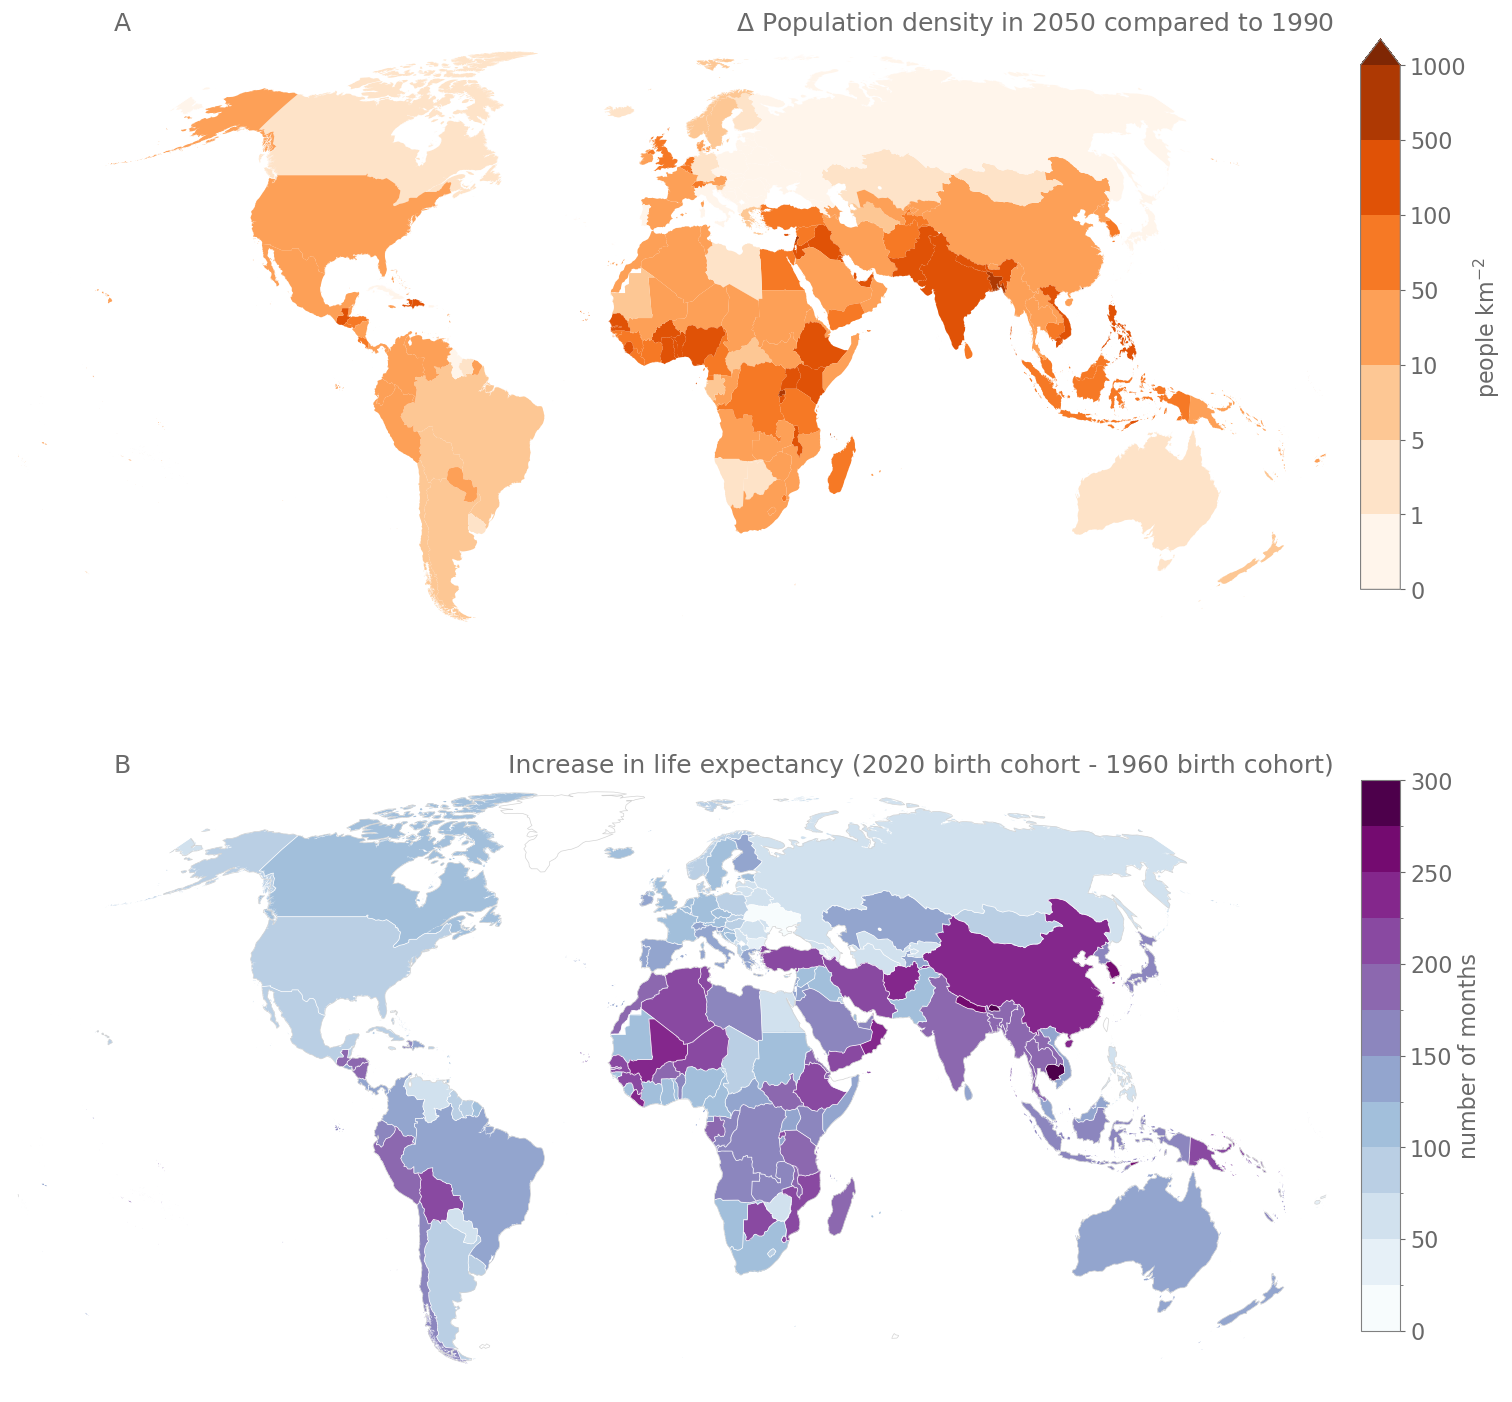

In [29]:
mpl.rc('ytick',labelsize=16)
mpl.rc('axes',labelsize=16)


fig, axes = plt.subplots(2,1,figsize=(15,15), subplot_kw={'projection':map_proj})
axes = axes.flatten()

ax = axes[0]

year = 2050
ref_year = 1990
legend_label = 'people km$^{-2}$'
gdf_country_borders['area_km2'] = gdf_country_borders.to_crs(ccrs.AlbersEqualArea()).area*1e-6 #km2
delta_totalpop_rel= ((d_cohorts_peryear[year].sum(axis=1) -d_cohorts_peryear[ref_year].sum(axis=1) )/gdf_country_borders['area_km2'] ).rename('dtotpop')

gdf_cohort_year = gdf_country_borders.merge(delta_totalpop_rel, left_index=True, right_index=True)
bounds = np.array([0,1,5,10,50,100,500,1000])

ax.axis('off')
cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis

gdf_cohort_year.plot(ax=ax, column='dtotpop', cax=cax, legend = True,legend_kwds={'label': legend_label},  cmap='Oranges',transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='max'))
ax.set_title('$\Delta$ Population density in '+str(year)+' compared to '+str(ref_year) , loc='right', fontsize=18); 
ax.set_title('             A', loc='left', fontsize=18);


ax = axes[1]

# plot per country the increase in months of average lifetime

variable='months_more2live'
df_months_moretolive = ((df_life_expectancy_5.loc[2020] - df_life_expectancy_5.loc[1960])*12).to_frame(name=variable)
bounds = np.array([0,25,50,75,100,125,150,175,200,225,250,275, 300])

legend_label = "number of months"

gdf_exposure_birthyear = gdf_country_borders.merge(df_months_moretolive, left_index=True, right_index=True)

ax.axis('off')
cax = ax.inset_axes((1.02, 0.1, 0.03, 0.9)); #make a color bar axis
ax.coastlines(color='lightgray',linewidth=0.5)
ax.add_feature(cfeature.BORDERS,color='white',linewidth=0.5)
gdf_exposure_birthyear.plot(ax=ax, column=variable, cax=cax, legend = True,  cmap='BuPu', legend_kwds={'label': legend_label}, transform=ccrs.PlateCarree(), norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256))
ax.set_title('Increase in life expectancy (2020 birth cohort - 1960 birth cohort)', loc='right' , fontsize=18); 
ax.set_title('             B', loc='left', fontsize=18);

fig.tight_layout()
plt.savefig('figures/population_density.png', bbox_inches='tight',dpi=600)


## Values population density - for discussion

In [25]:
countries = ['Ethiopia', 'Kenya', 'Tanzania', 'Madagascar']

for country in countries: 

    print(f"Population density increase for {country}: {gdf_cohort_year.loc[country,'dtotpop']:.0f} people/km²")



Population density increase for Ethiopia: 119 people/km²
Population density increase for Kenya: 112 people/km²
Population density increase for Tanzania: 96 people/km²
Population density increase for Madagascar: 57 people/km²


## Country uncertainty bars

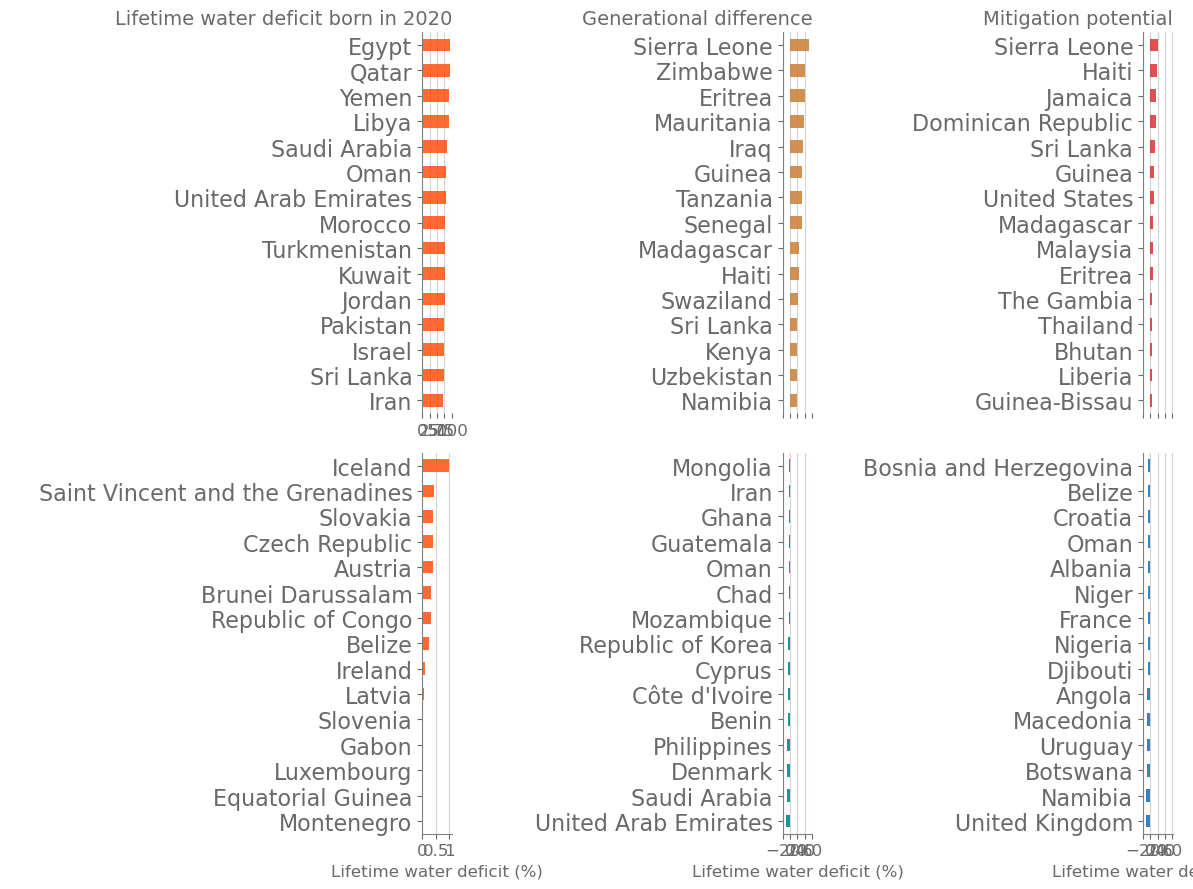

In [26]:
da = ds_pct_waterdeficit['mmm_RCP60']
df_1960 = da.to_pandas().loc[1960].transpose()
df_2020 = da.to_pandas().loc[2020].transpose()

# multi-model mean
da_rcp60 = ds_pct_waterdeficit['mmm_RCP60']
da_rcp26 = ds_pct_waterdeficit['mmm_RCP26']
df_rcp60 = da_rcp60.to_pandas().loc[2020].transpose()
df_rcp26 = da_rcp26.to_pandas().loc[2020].transpose()

df_mitigation = df_rcp60 - df_rcp26


nsel=15
fig, axes = plt.subplots(2,3, figsize=(12,9))
axes=axes.flatten()

ax=axes[0]


df_2020_sorted = df_2020.sort_values(ascending=False)[:nsel]

df_2020_sorted.iloc[::-1].plot.barh(ax=ax, zorder=2, color='orangered', alpha=0.8)

ax.set_ylabel(' ');
ax.set_xlim([0,101])
ax.set_xticks([0,25,50,75,100])
ax.spines[['right',  'top', 'bottom']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
ax.set_title('Lifetime water deficit born in 2020',loc='right', fontsize=14);

ax=axes[1]

df_delta_sorted = (df_2020 - df_1960).sort_values(ascending=False)[:nsel]
df_delta_sorted.iloc[::-1].plot.barh(ax=ax, zorder=2, alpha=0.9, color='peru')

ax.set_ylabel(' ');
ax.set_xlim([-20,61])
ax.set_xticks([-20,0,20,40,60])
ax.spines[['right',  'top',  'bottom']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
ax.set_title('Generational difference',loc='right', fontsize=14);
ax.tick_params(labelbottom=False)

ax=axes[2]

df_mitigation_sorted = df_mitigation.sort_values(ascending=False)[:nsel]

df_mitigation_sorted.iloc[::-1].plot.barh(ax=ax, zorder=2, color='tab:red', alpha=0.8)

ax.set_ylabel(' ');
ax.set_xlim([-20,61])
ax.set_xticks([-20,0,20,40,60])
ax.spines[['right',  'top', 'bottom']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
ax.set_title('Mitigation potential',loc='right', fontsize=14);
ax.tick_params(labelbottom=False)



ax=axes[3]


df_2020_sorted = df_2020.sort_values(ascending=False).dropna()[-nsel:]

df_2020_sorted.iloc[::-1].plot.barh(ax=ax, zorder=2, color='orangered', alpha=0.8)


ax.set_xlabel('Lifetime water deficit (%)', fontsize=12);
ax.set_ylabel(' ');
ax.set_xlim([0,1.1])
ax.set_xticks([0, 0.5,  1])
ax.set_xticklabels([0, 0.5,  1])

ax.spines[['right',  'top']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)

ax=axes[4]

df_delta_sorted = (df_2020 - df_1960).sort_values(ascending=False).dropna()[-nsel:].rename(index={'Côte d\Ivoire':'Côte d\'Ivoire'})
df_delta_sorted.iloc[::-1].plot.barh(ax=ax, zorder=2, color='darkcyan', alpha=0.9)

ax.set_xlabel('Lifetime water deficit (%)', fontsize=12);
ax.set_ylabel(' ');
ax.set_xlim([-20,61])
ax.set_xticks([-20,0,20,40,60])
ax.spines[['right',  'top']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)


ax=axes[5]

df_mitigation_sorted = df_mitigation.sort_values(ascending=False).dropna()[-nsel:]

df_mitigation_sorted.iloc[::-1].plot.barh(ax=ax, zorder=2, color='tab:blue', alpha=0.9)

ax.set_xlabel('Lifetime water deficit (%)', fontsize=12);
ax.set_ylabel(' ');
ax.set_xlim([-20,61])
ax.set_xticks([-20,0,20,40,60])
ax.spines[['right',  'top']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)

fig.tight_layout()

plt.savefig('figures/country_rankings_bar_uncertainty.png', bbox_inches='tight',dpi=600)


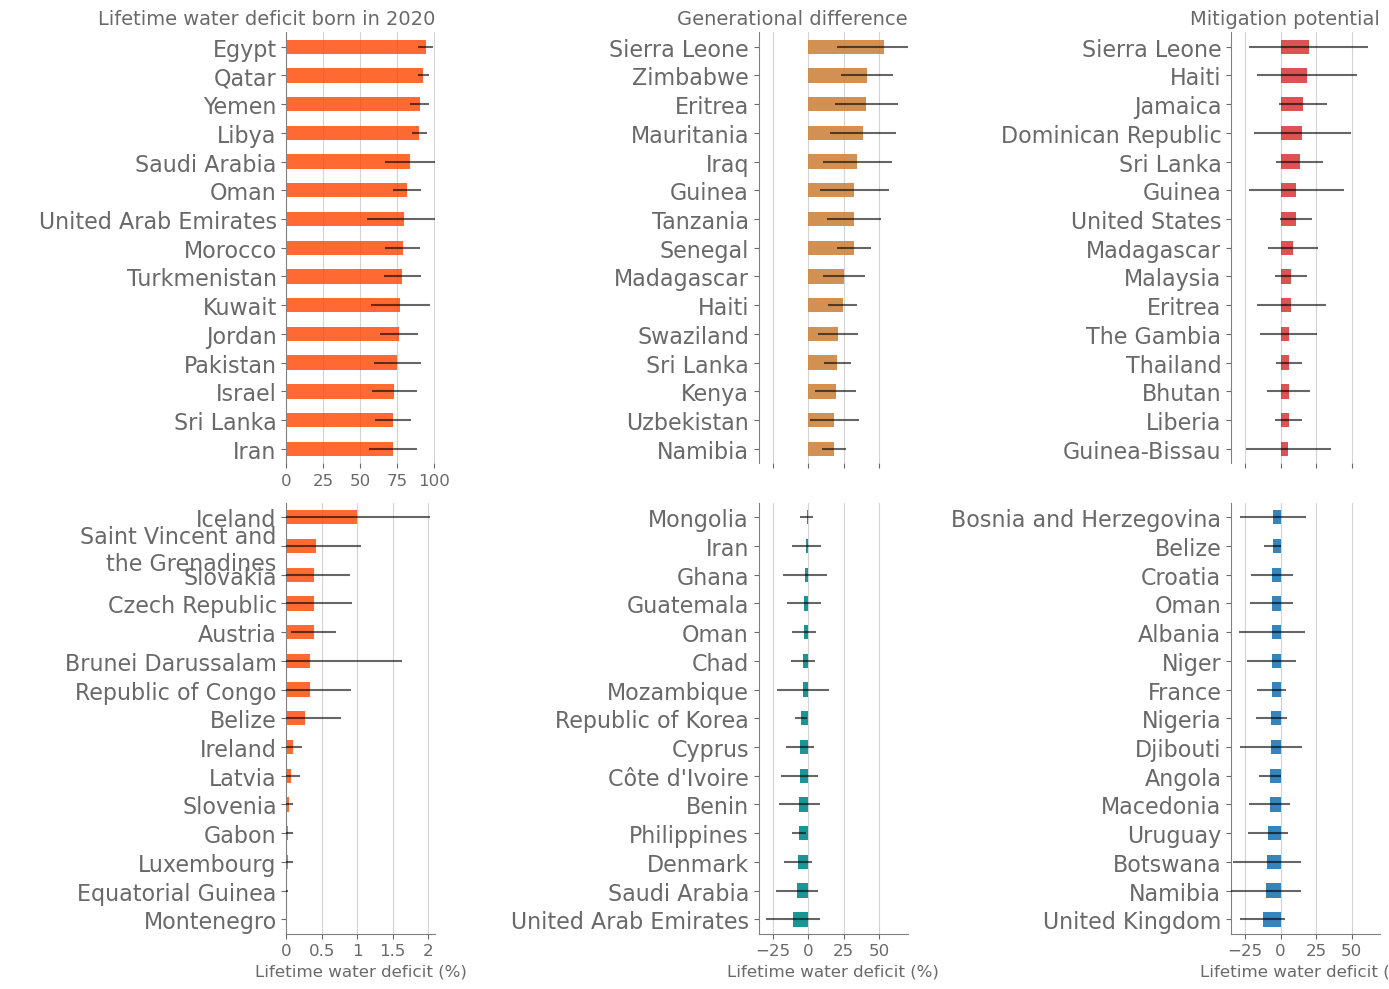

In [27]:
da = ds_pct_waterdeficit['mmm_RCP60']   
df_1960 = da.to_pandas().loc[1960].transpose().to_frame(name='mean')
df_2020 = da.to_pandas().loc[2020].transpose().to_frame(name='mean')


da_std = ds_pct_waterdeficit['std_RCP60']
df_2020['upper'] = ds_pct_waterdeficit['uqntl_RCP60'].to_pandas().loc[2020].transpose()
df_2020['lower'] = ds_pct_waterdeficit['lqntl_RCP60'].to_pandas().loc[2020].transpose()
df_2020['upper'] = (ds_pct_waterdeficit['mmm_RCP60'] - ds_pct_waterdeficit['std_RCP60']).to_pandas().loc[2020].transpose()
df_2020['lower'] = (ds_pct_waterdeficit['mmm_RCP60'] + ds_pct_waterdeficit['std_RCP60']).to_pandas().loc[2020].transpose()


df_delta = ds_pct_waterdeficit['mmm_delta_RCP60'].to_pandas().loc[1960].transpose().to_frame(name='mean')
df_delta['upper'] = ds_pct_waterdeficit['uqntl_delta_RCP60'].to_pandas().loc[1960].transpose()
df_delta['lower'] = ds_pct_waterdeficit['lqntl_delta_RCP60'].to_pandas().loc[1960].transpose()
df_delta['upper'] = (ds_pct_waterdeficit['mmm_delta_RCP60'] - ds_pct_waterdeficit['std_delta_RCP60']).to_pandas().loc[1960].transpose()
df_delta['lower'] = (ds_pct_waterdeficit['mmm_delta_RCP60'] + ds_pct_waterdeficit['std_delta_RCP60']).to_pandas().loc[1960].transpose()
# multi-model mean
da_rcp60 = ds_pct_waterdeficit['mmm_RCP60']
da_rcp26 = ds_pct_waterdeficit['mmm_RCP26']
df_rcp60 = da_rcp60.to_pandas().loc[2020].transpose().to_frame(name='mean')
df_rcp26 = da_rcp26.to_pandas().loc[2020].transpose().to_frame(name='mean')

df_mitigation = ds_pct_waterdeficit['mmm_mitigation_'].to_pandas().loc[2020].transpose().to_frame(name='mean')
df_mitigation['upper'] = ds_pct_waterdeficit['uqntl_mitigation_'].to_pandas().loc[2020].transpose()
df_mitigation['lower'] = ds_pct_waterdeficit['lqntl_mitigation_'].to_pandas().loc[2020].transpose()
df_mitigation['upper'] = (ds_pct_waterdeficit['mmm_mitigation_']-ds_pct_waterdeficit['std_mitigation_']).to_pandas().loc[2020].transpose()
df_mitigation['lower'] = (ds_pct_waterdeficit['mmm_mitigation_']+ds_pct_waterdeficit['std_mitigation_']).to_pandas().loc[2020].transpose()

nsel=15
fig, axes = plt.subplots(2,3, figsize=(14,10))
axes=axes.flatten()

ax=axes[0]


df_2020_sorted = df_2020.sort_values(by='mean', ascending=False)[:nsel]

df_2020_sorted['mean'].iloc[::-1].plot.barh(ax=ax, zorder=2, color='orangered', alpha=0.8)

my_range=range(0,len(df_2020_sorted.index))
ax.hlines(y=my_range, xmin=df_2020_sorted['lower'].iloc[::-1], xmax=df_2020_sorted['upper'].iloc[::-1], color='black',alpha=0.6, zorder=3)

ax.set_ylabel(' ');
ax.set_xlim([0,101])
ax.set_xticks([0,25,50,75,100])
ax.spines[['right',  'top', 'bottom']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
ax.set_title('Lifetime water deficit born in 2020',loc='right', fontsize=14);

ax=axes[1]

df_delta_sorted = (df_2020 - df_1960).sort_values(by='mean', ascending=False)[:nsel]
df_delta_sorted = (df_delta).sort_values(by='mean', ascending=False)[:nsel]

df_delta_sorted['mean'].iloc[::-1].plot.barh(ax=ax, zorder=2, alpha=0.9, color='peru')
ax.hlines(y=my_range, xmin=df_delta_sorted['lower'].iloc[::-1], xmax=df_delta_sorted['upper'].iloc[::-1], color='black',alpha=0.6, zorder=3)

ax.set_ylabel(' ');
ax.set_xlim([-35,70])
ax.set_xticks([-25,0,25,50])
ax.spines[['right',  'top',  'bottom']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
ax.set_title('Generational difference',loc='right', fontsize=14);
ax.tick_params(labelbottom=False)

ax=axes[2]

df_mitigation_sorted = df_mitigation.sort_values(by='mean',  ascending=False)[:nsel]

df_mitigation_sorted['mean'].iloc[::-1].plot.barh(ax=ax, zorder=2, color='tab:red', alpha=0.8)
ax.hlines(y=my_range, xmin=df_mitigation_sorted['lower'].iloc[::-1], xmax=df_mitigation_sorted['upper'].iloc[::-1], color='black',alpha=0.6, zorder=3)

ax.set_ylabel(' ');
ax.set_xlim([-35,70])
ax.set_xticks([-25,0,25,50])
ax.spines[['right',  'top', 'bottom']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)
ax.set_title('Mitigation potential',loc='right', fontsize=14);
ax.tick_params(labelbottom=False)



ax=axes[3]


df_2020_sorted = df_2020.sort_values(by='mean', ascending=False).dropna()[-nsel:].rename(index={'Saint Vincent and the Grenadines':'Saint Vincent and\nthe Grenadines'})

df_2020_sorted['mean'].iloc[::-1].plot.barh(ax=ax, zorder=2, color='orangered', alpha=0.8)
ax.hlines(y=my_range, xmin=df_2020_sorted['lower'].iloc[::-1], xmax=df_2020_sorted['upper'].iloc[::-1], color='black',alpha=0.6, zorder=3)


ax.set_xlabel('Lifetime water deficit (%)', fontsize=12);
ax.set_ylabel(' ');
ax.set_xlim([0,2.1])
ax.set_xticks([0, 0.5,  1, 1.5, 2])
ax.set_xticklabels([0, 0.5,  1, 1.5, 2])

ax.spines[['right',  'top']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)

ax=axes[4]

df_delta_sorted = (df_delta).sort_values(by='mean', ascending=False).dropna()[-nsel:].rename(index={'Côte d\Ivoire':'Côte d\'Ivoire'})
df_delta_sorted['mean'].iloc[::-1].plot.barh(ax=ax, zorder=2, color='darkcyan', alpha=0.9)
ax.hlines(y=my_range, xmin=df_delta_sorted['lower'].iloc[::-1], xmax=df_delta_sorted['upper'].iloc[::-1], color='black',alpha=0.6, zorder=3)

ax.set_xlabel('Lifetime water deficit (%)', fontsize=12);
ax.set_ylabel(' ');
ax.set_xlim([-35,70])
ax.set_xticks([-25,0,25,50])
ax.spines[['right',  'top']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)


ax=axes[5]

df_mitigation_sorted = df_mitigation.sort_values(by='mean',  ascending=False).dropna()[-nsel:]

df_mitigation_sorted['mean'].iloc[::-1].plot.barh(ax=ax, zorder=2, color='tab:blue', alpha=0.9)
ax.hlines(y=my_range, xmin=df_mitigation_sorted['lower'].iloc[::-1], xmax=df_mitigation_sorted['upper'].iloc[::-1], color='black',alpha=0.6, zorder=3)

ax.set_xlabel('Lifetime water deficit (%)', fontsize=12);
ax.set_ylabel(' ');
ax.set_xlim([-35,70])
ax.set_xticks([-25,0,25,50])
ax.spines[['right',  'top']].set_visible(False)    
ax.grid(color='lightgray', axis='x', alpha=1, zorder=1)

fig.tight_layout()

plt.savefig('figures/country_rankings_bar_uncertainty.png', bbox_inches='tight',dpi=600)


## Table with values

In [16]:
variable = 'mmm_RCP'
marker_generations = np.arange(1960,2030,10)

df = ds_pct_waterdeficit[variable].sel({'birth_year' : marker_generations}).to_pandas().T

# write as latex table

latex_str = df.to_latex(longtable=True, index=True, float_format="%.2f")
with open("figures/table_output.tex", "w") as f:
    f.write(latex_str)

latex_str = df.to_latex(
    longtable=True,
    index=True,
    float_format="%.2f",
    bold_rows=True
)